# Oil well development locational analysis

OilyGiant mining company is building a new oil well development. There are 3 possible regions to where the development can be established. Each region has different characteristics and volume of oil reserves that help determine its suitability for a new well development. The question is, which region is most suitable and will bring in the most profit based on this criteria? The modeling analysis and profit calculations in this report detail which regions are profitable, which ones are not, and provides recommendations for which location OilyGiant should consider for a new oil well development.

## Initialization

In [16]:
# Load all libraries and modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Load data

In [17]:
# Load data into three pandas DataFrames
data_0_url = 'https://raw.githubusercontent.com/rmodesitt/data-projects-TripleTen/refs/heads/main/oil-well-location-analysis/geo_data_0.csv'
data_1_url = 'https://raw.githubusercontent.com/rmodesitt/data-projects-TripleTen/refs/heads/main/oil-well-location-analysis/geo_data_1.csv'
data_2_url = 'https://raw.githubusercontent.com/rmodesitt/data-projects-TripleTen/refs/heads/main/oil-well-location-analysis/geo_data_2.csv'
data_0 = pd.read_csv(data_0_url)
data_1 = pd.read_csv(data_1_url)
data_2 = pd.read_csv(data_2_url)

## Data overview

The bulleted list below provides brief descriptions of the data provided in the three imported csv files. Each csv file, denoted <b>data_0</b>, <b>data_1</b>, and <b>data_2</b>, represents information about the region and its potential for a new oil well development. Each record represents one oil well in the region. <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b> represent different characteristics of the well and <b><mark>product</mark></b> represents the volume of oil reserves (per thousand barrels).

- <b><mark>id</mark></b> - unique oil well identifier
- <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, <b><mark>f2</mark></b> - three features of points (their specific meaning is unimportant, but the features themselves are significant)
- <b><mark>product</mark></b> - volume of reserves in the oil well (thousand barrels)

Below is a more thorough dive into the data. A general summary of the DataFrame and some extended analysis on certain columns adds more insight in what data the model will be working with.

### General summary

For each dataset, there is a total of 5 columns with a total of 100,000 records - that is, there is information on 100,000 different oil wells within each region. 4 fields are of a float data type and 1 is an object data type. There are also no missing values for any of the records. Some general observations about the columns include:

- <b><mark>id</mark></b> - is nonessential data from a modeling perspective. It doesn't provide any information about the oil well and only serves as a unique identifier
- <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b> - Even though the meaning behind these columns is largely unknown, just by looking at a few of the records it seems that negative values correlate to a lower volume of oil reserves, whereas higher, positive values correlate to a higher volume of oil reserves. These columns represent the <b>features</b> of the model
- <b><mark>product</mark></b> - this represents the <b>target</b>. The model will try to predict the volume of oil reserves each well contains

In [18]:
# Generate summary of region 0
data_0.info()
display(data_0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [19]:
# Generate summary of region 1
data_1.info()
display(data_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [20]:
# Generate summary of region 2
data_2.info()
display(data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Extended analysis

Additional analysis was performed on certain fields to get a better understanding on some of the data specifics. First, value ranges were gathered for the <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b> fields. Here are some observations.

- <b><mark>f0</mark></b>
    - <b>data_0</b> has a small value range hovering around 0, spanning from -1 to 2
    - <b>data_1</b> has a large value range, spanning from -31 to 29
    - <b>data_2</b> has an intermediate value range, bigger than <b>data_0</b>, spanning from -8 to 7
- <b><mark>f1</mark></b>
    - <b>data_0</b> has a small value range hovering around 0, similar to the <b><mark>f0</mark></b>, spanning from -1 to 1
    - <b>data_1</b> has a large value range, similar to the <b><mark>f0</mark></b>, spanning from -26 to 18
    - <b>data_2</b> has an intermediate value range, similar to the <b><mark>f0</mark></b>, spanning from -7 to 7
- <b><mark>f2</mark></b>
    - <b>data_0</b> has a larger value range than we have seen with the other features, spanning from -12 to 16
    - <b>data_1</b> has a small value range, spanning from 0 to 5
    - <b>data_2</b> has a larger value range than we have seen with the other features, spanning from -12 to 16
    
It still difficult to deduce what the features actually mean, but this information does provide good insight into what values might negatively or positively impact the region's ability to support an oil well development. Larger value ranges with more negative values are most likely going to have a negative impact on the region's suitability, and the inverse is true for value ranges with less or no negative values.
    
Value ranges and total sums were also gathered for the </b></mark>product</mark></b> field.

- <b>data_0</b> had a range of 0 to 185, and sum of 9,250,000
- <b>data_1</b> had a range of 0 to 138, and sum of 6,882,500
- <b>data_2</b> had a range of 0 to 190, and sum of 9,500,000

At first glance, the <b>data_1</b> region seems like it would not be a suitable location for a oil well development due to it's high range of negative values for the <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b> fields, and the lesser amount of oil reserves in the region. But we don't need to rely on first glances! Predictive modeling and analysis is going to bring light to this assumption. On to building a machine learning model!


f0 value range

DATA_0
-1.408605306026996 - 2.362330810854224

DATA_1
-31.609576019167687 - 29.42175461390372

DATA_2
-8.760003624213763 - 7.23826247979405


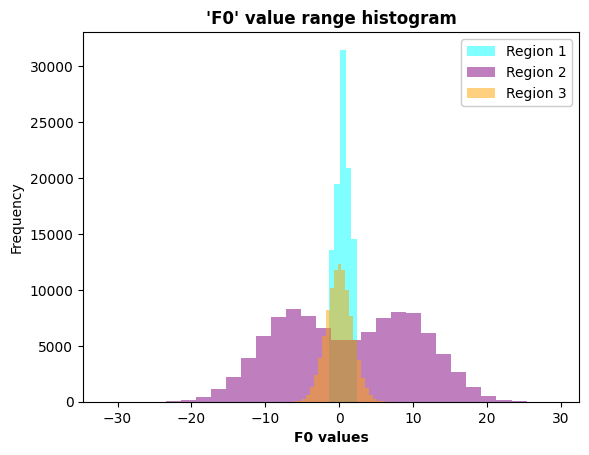

In [21]:
# Retrieve the range of f0 values for each region
print('f0 value range')
print()
print('DATA_0')
data_0_f0_min = data_0['f0'].min()
data_0_f0_max = data_0['f0'].max()
print(data_0_f0_min, '-', data_0_f0_max)
print()
print('DATA_1')
data_1_f0_min = data_1['f0'].min()
data_1_f0_max = data_1['f0'].max()
print(data_1_f0_min, '-', data_1_f0_max)
print()
print('DATA_2')
data_2_f0_min = data_2['f0'].min()
data_2_f0_max = data_2['f0'].max()
print(data_2_f0_min, '-', data_2_f0_max)

# Plot histogram
data_0_f0 = data_0['f0']
data_1_f0 = data_1['f0']
data_2_f0 = data_2['f0']

plt.hist(data_0_f0, histtype='stepfilled', bins=5, color='cyan', edgecolor=None, alpha=0.5)
plt.hist(data_1_f0, bins=30, histtype='stepfilled', color='purple', edgecolor=None, alpha=0.5)
plt.hist(data_2_f0, bins=30, histtype='stepfilled', color='orange', edgecolor=None, alpha=0.5)
plt.xlabel('F0 values', fontweight='bold')
plt.ylabel('Frequency')
plt.title("'F0' value range histogram", fontweight='bold')
plt.legend(['Region 1', 'Region 2', 'Region 3'], facecolor='white', framealpha=1.0)
plt.show()

f1 value range

DATA_0
-0.8482184970082173 - 1.343769333804496

DATA_1
-26.358598008345872 - 18.73406263373076

DATA_2
-7.084019760867246 - 7.844801270084258


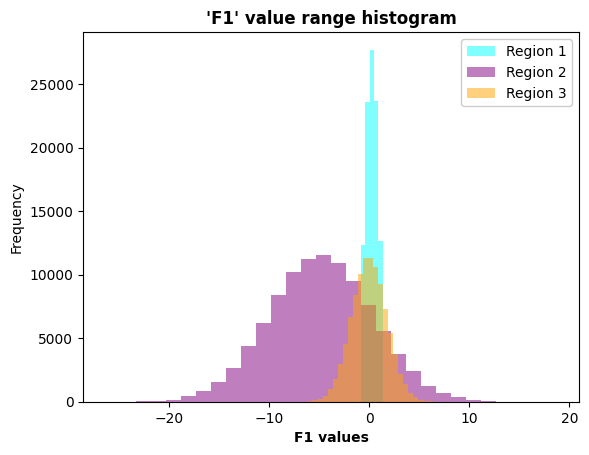

In [22]:
# Retrieve the range of f1 values for each region
print('f1 value range')
print()
print('DATA_0')
data_0_f1_min = data_0['f1'].min()
data_0_f1_max = data_0['f1'].max()
print(data_0_f1_min, '-', data_0_f1_max)
print()
print('DATA_1')
data_1_f1_min = data_1['f1'].min()
data_1_f1_max = data_1['f1'].max()
print(data_1_f1_min, '-', data_1_f1_max)
print()
print('DATA_2')
data_2_f1_min = data_2['f1'].min()
data_2_f1_max = data_2['f1'].max()
print(data_2_f1_min, '-', data_2_f1_max)

# Plot histogram
data_0_f1 = data_0['f1']
data_1_f1 = data_1['f1']
data_2_f1 = data_2['f1']

plt.hist(data_0_f1, histtype='stepfilled', bins=5, color='cyan', edgecolor=None, alpha=0.5)
plt.hist(data_1_f1, bins=30, histtype='stepfilled', color='purple', edgecolor=None, alpha=0.5)
plt.hist(data_2_f1, bins=30, histtype='stepfilled', color='orange', edgecolor=None, alpha=0.5)
plt.xlabel('F1 values', fontweight='bold')
plt.ylabel('Frequency')
plt.title("'F1' value range histogram", fontweight='bold')
plt.legend(['Region 1', 'Region 2', 'Region 3'], facecolor='white', framealpha=1.0)
plt.show()

f2 value range

DATA_0
-12.08832811806336 - 16.003790007695365

DATA_1
-0.0181440867134202 - 5.019720555223062

DATA_2
-11.97033454147699 - 16.73940205869952


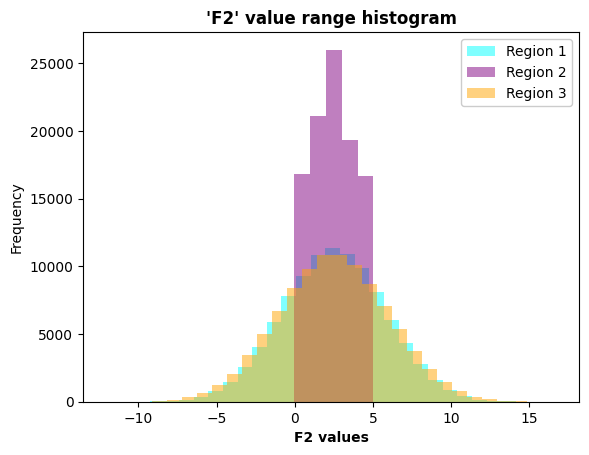

In [23]:
# Retrieve the range of f2 values for each region
print('f2 value range')
print()
print('DATA_0')
data_0_f2_min = data_0['f2'].min()
data_0_f2_max = data_0['f2'].max()
print(data_0_f2_min, '-', data_0_f2_max)
print()
print('DATA_1')
data_1_f2_min = data_1['f2'].min()
data_1_f2_max = data_1['f2'].max()
print(data_1_f2_min, '-', data_1_f2_max)
print()
print('DATA_2')
data_2_f2_min = data_2['f2'].min()
data_2_f2_max = data_2['f2'].max()
print(data_2_f2_min, '-', data_2_f2_max)

# Plot histogram
data_0_f2 = data_0['f2']
data_1_f2 = data_1['f2']
data_2_f2 = data_2['f2']

plt.hist(data_0_f2, histtype='stepfilled', bins=30, color='cyan', edgecolor=None, alpha=0.5)
plt.hist(data_1_f2, bins=5, histtype='stepfilled', color='purple', edgecolor=None, alpha=0.5)
plt.hist(data_2_f2, bins=30, histtype='stepfilled', color='orange', edgecolor=None, alpha=0.5)
plt.xlabel('F2 values', fontweight='bold')
plt.ylabel('Frequency')
plt.title("'F2' value range histogram", fontweight='bold')
plt.legend(['Region 1', 'Region 2', 'Region 3'], facecolor='white', framealpha=1.0)
plt.show()

In [24]:
# Retrieve the range of values for product for each region
print('product value range')
print()
print('DATA_0')
print(data_0['product'].min(), '-', data_0['product'].max())
print()
print('DATA_1')
print(data_1['product'].min(), '-', data_1['product'].max())
print()
print('DATA_2')
print(data_2['product'].min(), '-', data_2['product'].max())

product value range

DATA_0
0.0 - 185.3643474222929

DATA_1
0.0 - 137.94540774090564

DATA_2
0.0 - 190.0298383433513


product value range

DATA_0
0.0 - 185.3643474222929

DATA_1
0.0 - 137.94540774090564

DATA_2
0.0 - 190.0298383433513


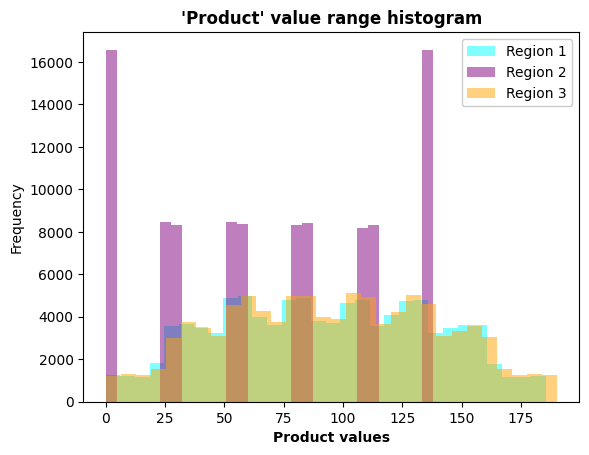

In [25]:
# Retrieve the range of f2 values for each region
print('product value range')
print()
print('DATA_0')
data_0_product_min = data_0['product'].min()
data_0_product_max = data_0['product'].max()
print(data_0_product_min, '-', data_0_product_max)
print()
print('DATA_1')
data_1_product_min = data_1['product'].min()
data_1_product_max = data_1['product'].max()
print(data_1_product_min, '-', data_1_product_max)
print()
print('DATA_2')
data_2_product_min = data_2['product'].min()
data_2_product_max = data_2['product'].max()
print(data_2_product_min, '-', data_2_product_max)

# Plot histogram
data_0_product = data_0['product']
data_1_product = data_1['product']
data_2_product = data_2['product']

plt.hist(data_0_product, histtype='stepfilled', bins=30, color='cyan', edgecolor=None, alpha=0.5, zorder=1)
plt.hist(data_1_product, bins=30, histtype='stepfilled', color='purple', edgecolor=None, alpha=0.5, zorder=1)
plt.hist(data_2_product, bins=30, histtype='stepfilled', color='orange', edgecolor=None, alpha=0.5, zorder=1)
plt.xlabel('Product values', fontweight='bold')
plt.ylabel('Frequency')
plt.title("'Product' value range histogram", fontweight='bold')
plt.legend(['Region 1', 'Region 2', 'Region 3'], facecolor='white', framealpha=1.0)
plt.show()

product value range

DATA_0
9250000.0

DATA_1
6882500.0

DATA_2
9500000.0


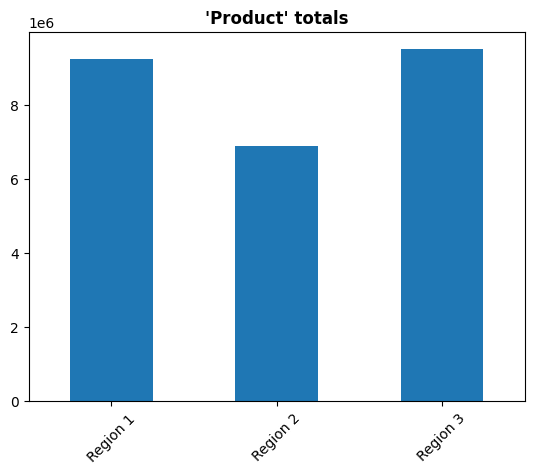

In [26]:
# Get the sum of product for each region
print('product value range')
print()
print('DATA_0')
data_0_product_sum = round(data_0['product'].sum(), 2)
print(data_0_product_sum)
print()
print('DATA_1')
data_1_product_sum = round(data_1['product'].sum(), 2)
print(data_1_product_sum)
print()
print('DATA_2')
data_2_product_sum = round(data_2['product'].sum(), 2)
print(data_2_product_sum) 

# Show the plot
product_sums = [data_0_product_sum, data_1_product_sum, data_2_product_sum]
product_sums_series = pd.Series(product_sums)
product_sums_series = product_sums_series.rename(index={0: 'Region 1', 1: 'Region 2', 2: 'Region 3'})

plt.title("'Product' totals", fontweight='bold')
product_sums_series.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## Data preparation

All data types for the fields are correct. The meaning of the <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b> fields are largely unknown at this point, so changing the type to integer and removing the leading decimal information does not make sense. Also, the <b><mark>product</mark></b> field has revenue and profit implications to it. The amount of oil reserves has a correlation to how much money the region can product. So, even though the amount of money lost or gained could not be substantial if the type was changed to integer, but it is hard to say. It is a safer to leave the data type as is.

There were no duplicate rows in the any of the three datasets, but there were duplicate ids in the <b><mark>id</mark></b> column. The amount of duplicates is not substantial compared to the amount of records in the dataset itself, but it is confusing that there is different information on the same exact well. So, it was decided to replace the <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, <b><mark>f2</mark></b>, and <b><mark>product</mark></b> values of the duplicates with the mean of the duplicate records. For example, for the duplicate id <b>74z30</b>, the means of all 4 columns replaced the current values in the dataset. Then the one of the duplicate records was removed.

Lastly, it was determined that the <b><mark>id</mark></b> column was not going to be useful in predicting the volume of oil reserves in each region because the column doesn't provide any useful information. It is just a unique identifier of each well. This column has been removed from each dataset so it wouldn't be a part of the features in the models.

### Duplicate values

In [27]:
# Duplicate rows
print(data_0.duplicated().sum())
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())

0
0
0


In [28]:
# Region 1 duplicate ids
data_0_dup_ids = data_0[data_0.duplicated(subset=['id'], keep=False)]
data_0_dup_ids = data_0_dup_ids.sort_values('id')
print('Number of region 1 duplicate records:', data_0_dup_ids.count()['id'])
display(data_0_dup_ids)

Number of region 1 duplicate records: 20


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [29]:
# Region 2 duplicate ids
data_1_dup_ids = data_1[data_1.duplicated(subset=['id'], keep=False)]
data_1_dup_ids = data_1_dup_ids.sort_values('id')
print('Number of region 2 duplicate records:', data_1_dup_ids.count()['id'])
display(data_1_dup_ids)

Number of region 2 duplicate records: 8


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [30]:
# Region 3 duplicate ids
data_2_dup_ids = data_2[data_2.duplicated(subset=['id'], keep=False)]
data_2_dup_ids = data_2_dup_ids.sort_values('id')
print('Number of region 3 duplicate records:', data_2_dup_ids.count()['id'])
display(data_2_dup_ids)

Number of region 3 duplicate records: 8


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [31]:
# Find and replace values of columns with mean values
data_0[['product', 'f0', 'f1', 'f2']] = data_0.groupby('id')[['product', 'f0', 'f1', 'f2']].transform('mean')
data_1[['product', 'f0', 'f1', 'f2']] = data_1.groupby('id')[['product', 'f0', 'f1', 'f2']].transform('mean')
data_2[['product', 'f0', 'f1', 'f2']] = data_2.groupby('id')[['product', 'f0', 'f1', 'f2']].transform('mean')

In [32]:
# Drop duplicates
data_0 = data_0.drop_duplicates(subset='id')
data_1 = data_1.drop_duplicates(subset='id')
data_2 = data_2.drop_duplicates(subset='id')
print(data_0[data_0.duplicated(subset='id')])
print(data_1[data_1.duplicated(subset='id')])
print(data_2[data_2.duplicated(subset='id')])

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []
Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []


In [33]:
# Retrieve new shapes of DataFrames
print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(99990, 5)
(99996, 5)
(99996, 5)


### Column engineering

In [34]:
data_0 = data_0.drop('id', axis=1)
display(data_0.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [35]:
data_1 = data_1.drop('id', axis=1)
display(data_1.head())

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [36]:
data_2 = data_2.drop('id', axis=1)
display(data_2.head())

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


## Model preparation

### Training and validation datasets

In [37]:
# Split data into training and validation datasets for DATA_0
data_0_train, data_0_valid = train_test_split(data_0, test_size=0.25, random_state=123)

# Split data into training and validation datasets for DATA_1
data_1_train, data_1_valid = train_test_split(data_1, test_size=0.25, random_state=123)

# Split data into training and validation datasets for DATA_2
data_2_train, data_2_valid = train_test_split(data_2, test_size=0.25, random_state=123)

### Features and target

The finalized list of features include the <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b> fields. <b><mark>id</mark></b> was removed because it does not contain any useful information for predictive modeling. <b><mark>product</mark></b> is the target the models will try to predict. The goal is to build a model that will successfully predict the volume of oil reserves for each well based on <b><mark>f0</mark></b>, <b><mark>f1</mark></b>, and <b><mark>f2</mark></b>.

In [38]:
# Define features and target variables for DATA_0
# TRAINING
data_0_train_features = data_0_train.drop('product', axis=1)
data_0_train_target = data_0_train['product']

# VALIDATION
data_0_valid_features = data_0_valid.drop('product', axis=1)
data_0_valid_target = data_0_valid['product']

In [39]:
# Define features and target variables for DATA_1
# TRAINING
data_1_train_features = data_1_train.drop('product', axis=1)
data_1_train_target = data_1_train['product']

# VALIDATION
data_1_valid_features = data_1_valid.drop('product', axis=1)
data_1_valid_target = data_1_valid['product']

In [40]:
# Define features and target variables for DATA_2
#TRAINING
data_2_train_features = data_2_train.drop('product', axis=1)
data_2_train_target = data_2_train['product']

# VALIDATION
data_2_valid_features = data_2_valid.drop('product', axis=1)
data_2_valid_target = data_2_valid['product']

## Model analysis

Each region, ie region 1, region 2, and region 3, are represented by the DataFrame names <b>data_0</b>, <b>data_1</b>, and <b>data_2</b> respectively, and as shown above, were split into training and validation datasets, and features and targets using the same nomenclature. For each region, a linear regression model was created to gather predictions forecasting the volume of oil reserves for each well. The  The Root Mean Squared Error (RMSE) was obtained to assess the performance of the model. Also, the average of oil reserves of all wells within the region was calculated.

### Region 1 (data_0)

To check the model quality, a k-fold cross validation was implemented. The model score was <b>37.73</b>. Not very good. Even before gathering predictions, the model doesn't do a great job with just the training data itself, data that it has already seen.

After the model was trained and predictions were gathered, here was the RMSE and average oil reserves per well.

- RMSE: <b>37.596</b>
- Average reserves per well: <b>92.681</b>

The high RMSE implies there are significant mistakes and fewer accurate forecasts. The model is not doing a good job at predicting values close to the correct answers. The plot of the linear regresion below shows the distribution and trends of the predicted values vs actual values. The most accurate regression will be a straight diagonal, but the model here is more of a slant, again implying that there are some inaccuracies.

In [41]:
# Intialize linear regression model
model_data_0 = LinearRegression()

# Cross-validate model
data_0_scores = cross_val_score(model_data_0, data_0_train_features, data_0_train_target, scoring= 'neg_root_mean_squared_error', cv=5)
data_0_final_score = abs(sum(data_0_scores) / len(data_0_scores))
print('Average model evaluation score:', data_0_final_score)

Average model evaluation score: 37.7257343482076


In [43]:
# Run model against validation dataset
model_data_0.fit(data_0_train_features, data_0_train_target)

# Get predictions and retrieve RMSE and average volume of oil reserves
data_0_preds = model_data_0.predict(data_0_valid_features)
data_0_RMSE = abs(mean_squared_error(data_0_valid_target, data_0_preds)**0.5)
data_0_avg_resvs = sum(data_0_preds) / len(data_0_preds)
print()
print('Root mean squared error:', data_0_RMSE)
print('Average volume of oil reserves per well (in thousand barrels):', data_0_avg_resvs)
print()
print()
print('Correct answers snip-it:')
print()
print(data_0_valid_target.head())
print()
print('Predicted answers snip-it')
print()
print(np.vstack(data_0_preds[:5]))


Root mean squared error: 37.59533596100552
Average volume of oil reserves per well (in thousand barrels): 92.68087123363215


Correct answers snip-it:

79861     87.254662
89546     52.105159
56756     28.822988
99544    114.402733
59246     81.595046
Name: product, dtype: float64

Predicted answers snip-it

[[111.11372326]
 [107.11743205]
 [120.45429483]
 [130.34523718]
 [114.59132905]]


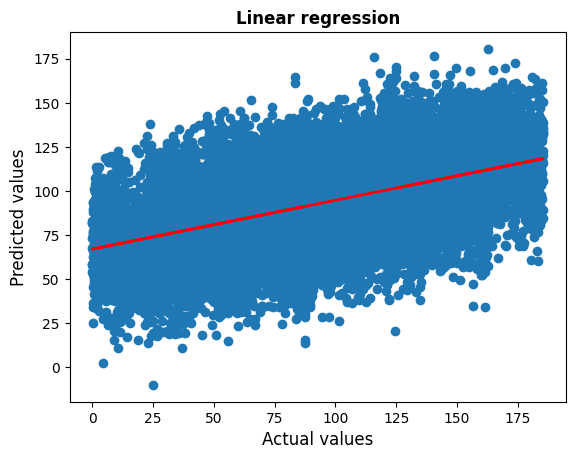

In [44]:
# Plot the answers, predictions, and regression line
plt.scatter(data_0_valid_target, data_0_preds)
plt.xlabel('Actual values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title('Linear regression', fontweight='bold')
ax = plt.gca()
ax.set_facecolor("white")
data_0_valid_target_array = np.array(data_0_valid_target)
data_0_preds_array = np.array(data_0_preds)
b1, b0 = np.polyfit(data_0_valid_target_array, data_0_preds_array, 1)
plt.plot(data_0_valid_target_array, b1*data_0_valid_target_array + b0, color='red', linewidth=2)
plt.show()

### Region 2 (data_1)

A k-fold cross validation was also implemented for region 2. The model score was <b>0.89</b>! Amazing! Almost too amazing. The model performed so well, that this could lead to questions around the data itself, where it came from, how it was gathered, etc.

After the model was trained and predictions were gathered, here was the RMSE and average oil reserves per well.

- RMSE: <b>0.895</b>
- Average reserves per well: <b>69.280</b>

The low RMSE implies that the predicted values are very close to the the actual values from the dataset. The model is doing a great job at forcasting. The plot of the linear regression below shows the distribution and trends of the predicted values vs actual values. The regression line is a perfect diagonal and the points are right next to / on top of each other, implying that the model is very accurate in making predictions. Lastly, the average reserves per well for region 2 are substanially lower than region 1. This might not be important right now, but it is something to note for profit calculations later in the report.

In [45]:
# Intialize linear regression model
model_data_1 = LinearRegression()

# Cross-validate model
data_1_scores = cross_val_score(model_data_1, data_1_train_features, data_1_train_target, cv=5, scoring='neg_root_mean_squared_error')
data_1_final_score = abs(sum(data_1_scores) / len(data_1_scores))
print('Average model evaluation score:', data_1_final_score)

Average model evaluation score: 0.8890979339621566


In [46]:
# Run model against validation dataset
model_data_1.fit(data_1_train_features, data_1_train_target)

# Get predictions and retrieve RMSE and average volume of oil reserves
data_1_preds = model_data_1.predict(data_1_valid_features)
data_1_RMSE = mean_squared_error(data_1_valid_target, data_1_preds)**0.5
data_1_avg_resvs = sum(data_1_preds) / len(data_1_preds)
print()
print('Root mean squared error:', data_1_RMSE)
print('Average volume of oil reserves per well (in thousand barrels):', data_1_avg_resvs)
print()
print()
print('Correct answers snip-it:')
print()
print(data_1_valid_target.head())
print()
print('Predicted answers snip-it:')
print()
print(np.vstack(data_1_preds[:5]))


Root mean squared error: 0.8944722104395623
Average volume of oil reserves per well (in thousand barrels): 69.31319932042442


Correct answers snip-it:

42084    57.085625
72732    30.132364
71151    84.038886
50170    26.953261
36734    53.906522
Name: product, dtype: float64

Predicted answers snip-it:

[[56.09675448]
 [30.17954897]
 [82.55082549]
 [28.2435595 ]
 [54.47788181]]


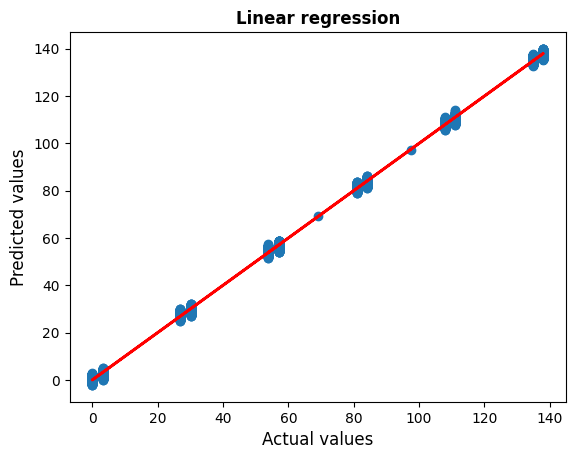

In [47]:
# Plot the answers, predictions, and regression line
plt.figure(facecolor='white')
plt.scatter(data_1_valid_target, data_1_preds)
plt.xlabel('Actual values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title('Linear regression', fontweight='bold')
ax = plt.gca()
ax.set_facecolor("white")
data_1_valid_target_array = np.array(data_1_valid_target)
data_1_preds_array = np.array(data_1_preds)
b1, b0 = np.polyfit(data_1_valid_target_array, data_1_preds_array, 1)
plt.plot(data_1_valid_target_array, b1*data_1_valid_target_array + b0, color='red', linewidth=2)
plt.show()

### Region 3 (data_2)

A k-fold cross validation was also implemented for region 2. The model score was <b>-40.06</b>. Not very good and similar to region 1s model score.

After the model was trained and predictions were gathered, here was the RMSE and average oil reserves per well.

- RMSE: <b>40.04</b>
- Average reserves per well: <b>94.94</b>

The high RMSE implies there are significant mistakes and fewer accurate forecasts. As with region 1, thw model is not doing a good job at predicting values close to the correct answers. Also, the plot of the linear regression line is a slant, implying that there are some inaccuracies.

Moreover, region 1 and region 3 yielded very similar results. Their model scores, RMSE, and average reserves per well were nearly identical. Could this mean that their profit margins will be similar as well?

In [48]:
# Intialize linear regression model
model_data_2 = LinearRegression()

# Cross-validate model
data_2_scores = cross_val_score(model_data_2, data_2_train_features, data_2_train_target, cv=5, scoring='neg_root_mean_squared_error')
data_2_final_score = abs(sum(data_2_scores) / len(data_2_scores))
print('Average model evaluation score:', data_2_final_score)

Average model evaluation score: 40.05784623446602


In [49]:
# Run model against validation dataset
model_data_2.fit(data_2_train_features, data_2_train_target)

# Get predictions and retrieve RMSE and average volume of oil reserves
data_2_preds = model_data_2.predict(data_2_valid_features)
data_2_RMSE = mean_squared_error(data_2_valid_target, data_2_preds)**0.5
data_2_avg_resvs = sum(data_2_preds) / len(data_2_preds)
print()
print('Root mean squared error:', data_2_RMSE)
print('Average volume of oil reserves per well (in thousand barrels):', data_2_avg_resvs)
print()
print()
print('Correct answers snip-it:')
print()
print(data_2_valid_target.head())
print()
print('Predicted answers snip-it:')
print()
print(np.vstack(data_2_preds[:5]))


Root mean squared error: 40.04173023103197
Average volume of oil reserves per well (in thousand barrels): 94.93843921318874


Correct answers snip-it:

42083    147.451978
72734    149.352596
71153    166.026693
50171    122.374648
36734    159.328488
Name: product, dtype: float64

Predicted answers snip-it:

[[ 94.05934612]
 [ 69.27173523]
 [111.5019359 ]
 [130.40760367]
 [ 89.83487353]]


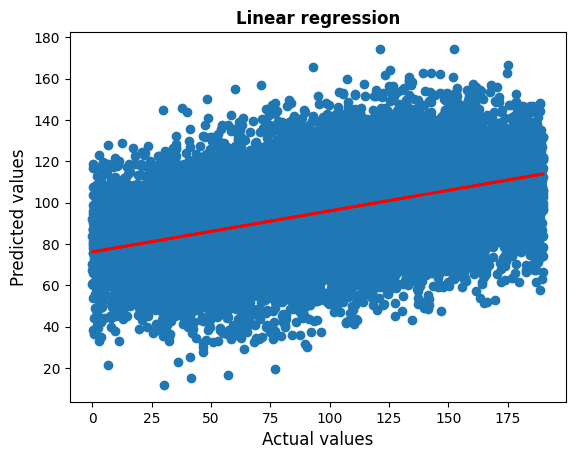

In [50]:
# Plot the answers, predictions, and regression line
plt.figure(facecolor='white')
plt.scatter(data_2_valid_target, data_2_preds)
plt.xlabel('Actual values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title('Linear regression', fontweight='bold')
ax = plt.gca()
ax.set_facecolor("white")
data_2_valid_target_array = np.array(data_2_valid_target)
data_2_preds_array = np.array(data_2_preds)
b1, b0 = np.polyfit(data_2_valid_target_array, data_2_preds_array, 1)
plt.plot(data_2_valid_target_array, b1*data_2_valid_target_array + b0, color='red', linewidth=2)
plt.show()

## Profit analysis

Given the oil reserve predictions from the models, which region will the provide the highest profit margin? Are any of the regions profitable? First, a comparison of the oil reserve averages for each region is carried out. Then profit calculations are performed to identify the mean profit, 95% confidence interval, and loss potential for each region. This analysis determines which region, if any, is best to a new oil well development.

### Oil reserves comparison

The average oil reserves per well for each region were gathered. Region 1 and region 3 have about the same averages, while region 2 has substantially less, having approximately 25 thousand barrels less per well. It it natural to think that more volume of oil reserves will mean more profit. But this is just an assumption. The profitability of each region will be determined later in the report.

- Region 1: <b>92.50</b>
- Region 2: <b>68.82</b>
- Region 3: <b>95.00</b>

An important statistic in assessing the probability of any investment is the break even point, that is, what is the oil reserves that needs to be generated from a well to prevent any losses. The break even point is <b><font color='red'>111.11</font></b>. This is much higher than the averages of all three regions. This again assumes that the profitability of all the regions is in question, and there might not be any profitability. But it is possible that even with low averages, since OilyGiant is only selecting the top 200 wells, there could be certain wells with a lot of reserves that could even out wells with lower averages.

In [51]:
# Retrieve average oil reserves (from answers) for each region 
print('Region 1 average oil reserves per well:', data_0['product'].mean())
print('Region 2 average oil reserves per well:', data_1['product'].mean())
print('Region 3 average oil reserves per well:', data_2['product'].mean())
print()

# Calculate volume of oil reserves sufficient for developing a new well without losses
PROJECT_BUDGET = 100000000
NUMBER_OF_WELLS = 200
REVENUE_PER_RESERVE = 4500

volume_reserves_needed = round(PROJECT_BUDGET / REVENUE_PER_RESERVE, 2)
print('Volume of oil reserves (in thousand barrels) needed to reach project budget:', volume_reserves_needed)
break_even_point = round(volume_reserves_needed / NUMBER_OF_WELLS, 2)
print('Volume of oil reserves per well needed to prevent a net loss:', break_even_point)

Region 1 average oil reserves per well: 92.49958303117246
Region 2 average oil reserves per well: 68.824573880372
Region 3 average oil reserves per well: 94.99938345850404

Volume of oil reserves (in thousand barrels) needed to reach project budget: 22222.22
Volume of oil reserves per well needed to prevent a net loss: 111.11


#### Region 1 (data_0)

A bit more analysis is performed on the counts of profitable wells versus non-profitable wells based on the break even point of <b>111.11</b>. Wells above 111.11 are profitable and wells below 111.11 are not profitable. The top 20 wells in terms of oil reserves is also gathered and displayed.

- Profitable wells: <b>36,580</b>
- Non-profitable wells: <b>63,410</b>
- Profitable wells %: <b>36.58%</b>



Number of profitable wells: 36580
Number of non-profitable wells: 63410
Profitable well %: 36.58 %


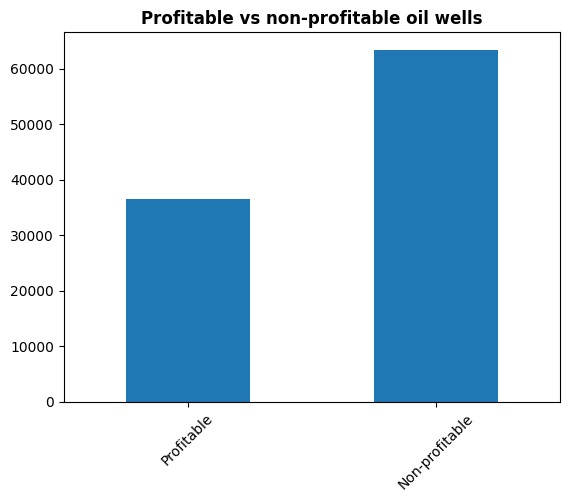

8826     185.364347
99818    185.362690
94175    185.355615
1925     185.354980
45291    185.352015
28690    185.344675
45259    185.338370
22823    185.337352
98975    185.330529
93314    185.317346
66714    185.315412
21041    185.314475
89688    185.304563
31006    185.299685
80036    185.297021
37250    185.293551
77717    185.289402
6726     185.267516
83963    185.264218
98529    185.261773
Name: product, dtype: float64

In [52]:
# Count of net gain wells
data_0_profit_wells = len(data_0[data_0['product'] > 111.11])
data_0_no_profit_wells = len(data_0[data_0['product'] <= 111.11])
print()
print('Number of profitable wells:', data_0_profit_wells)
print('Number of non-profitable wells:', data_0_no_profit_wells)
print('Profitable well %:', round(data_0_profit_wells / (data_0_profit_wells + data_0_no_profit_wells) * 100, 2), '%')

# Plot bar chart of profitable vs non-profitable wells
wells_profit_counts = pd.Series([data_0_profit_wells, data_0_no_profit_wells])
wells_profit_counts = wells_profit_counts.rename(index={0: 'Profitable', 1: 'Non-profitable'}) 

plt.title('Profitable vs non-profitable oil wells', fontweight='bold')
wells_profit_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# Top 20 oil reserves
data_0_sort = data_0.sort_values('product', ascending=False)
display(data_0_sort['product'].head(20))

#data_0_preds_sort = np.sort(data_0_preds)[::-1]
#print('Top 20 oil reserve amounts (in thousand barrels)')
#display(data_0_preds_sort[:20])

#### Region 2 (data_1)

Below are the counts of profitable wells vs non-profitable wells for region 2. An interesting observation about the top 20 wells in terms of oil reserves is that they all are <b>137</b>. This supports what was seen in the model score and linear regression line. It looks like their are many data points that are very similar, which would make predicting future values much more accurate.

- Profitable wells: <b>16,536</b>
- Non-profitable wells: <b>83,460</b>
- Profitable wells %: <b>16.54%</b>


Number of profitable wells: 16536
Number of non-profitable wells: 83460
Profitable well %: 16.54 %


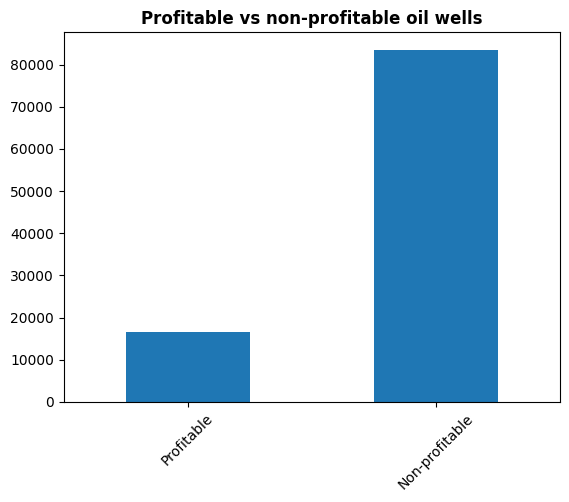

88097    137.945408
30951    137.945408
5796     137.945408
30954    137.945408
69169    137.945408
81193    137.945408
89963    137.945408
41011    137.945408
34238    137.945408
95318    137.945408
55913    137.945408
76400    137.945408
13870    137.945408
44736    137.945408
55910    137.945408
41008    137.945408
5780     137.945408
30938    137.945408
21941    137.945408
34239    137.945408
Name: product, dtype: float64

In [53]:
# Count of net gain wells
data_1_profit_wells = len(data_1[data_1['product'] > 111.11])
data_1_no_profit_wells = len(data_1[data_1['product'] <= 111.11])
print()
print('Number of profitable wells:', data_1_profit_wells)
print('Number of non-profitable wells:', data_1_no_profit_wells)
print('Profitable well %:', round(data_1_profit_wells / (data_1_profit_wells + data_1_no_profit_wells) * 100, 2), '%')

# Plot bar chart of profitable vs non-profitable wells
wells_profit_counts = pd.Series([data_1_profit_wells, data_1_no_profit_wells])
wells_profit_counts = wells_profit_counts.rename(index={0: 'Profitable', 1: 'Non-profitable'}) 

plt.title('Profitable vs non-profitable oil wells', fontweight='bold')
wells_profit_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# Top 20 oil reserves
data_1_sort = data_1.sort_values('product', ascending=False)
display(data_1_sort['product'].head(20))

#data_1_preds_sort = np.sort(data_1_preds)[::-1]
#print('Top 20 oil reserve amounts (in thousand barrels)')
#display(data_1_preds_sort[:20])

#### Region 3 (data_2)

Below are the counts of profitable wells vs non-profitable wells for region 3. Very similar to region 1.

- Profitable wells: <b>38,175</b>
- Non-profitable wells: <b>67,821</b>
- Profitable wells %: <b>38.18%</b>


Number of profitable wells: 38175
Number of non-profitable wells: 61821
Profitable well %: 38.18 %


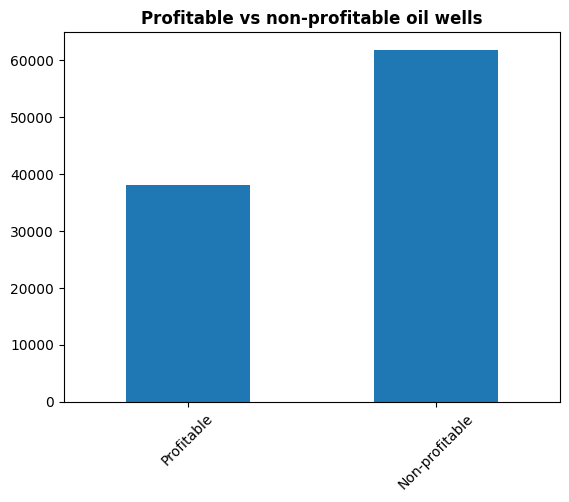

79705    190.029838
93444    190.013589
35099    190.011722
21943    190.010982
37870    190.010029
59130    189.996462
8698     189.988191
38595    189.986781
80200    189.985532
58481    189.981304
2914     189.979704
91513    189.978186
14464    189.976606
915      189.973633
72141    189.968677
99073    189.967197
83472    189.966835
3927     189.952654
92373    189.949834
49615    189.948611
Name: product, dtype: float64

In [54]:
# Count of net gain wells
data_2_profit_wells = len(data_2[data_2['product'] > 111.11])
data_2_no_profit_wells = len(data_2[data_2['product'] <= 111.11])
print()
print('Number of profitable wells:', data_2_profit_wells)
print('Number of non-profitable wells:', data_2_no_profit_wells)
print('Profitable well %:', round(data_2_profit_wells / (data_2_profit_wells + data_2_no_profit_wells) * 100, 2), '%')

# Plot bar chart of profitable vs non-profitable wells
wells_profit_counts = pd.Series([data_2_profit_wells, data_2_no_profit_wells])
wells_profit_counts = wells_profit_counts.rename(index={0: 'Profitable', 1: 'Non-profitable'}) 

plt.title('Profitable vs non-profitable oil wells', fontweight='bold')
wells_profit_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# Top 20 oil reserves
data_2_sort = data_2.sort_values('product', ascending=False)
display(data_2_sort['product'].head(20))

#data_2_preds_sort = np.sort(data_2_preds)[::-1]
#print('Top 20 oil reserve amounts (in thousand barrels)')
#display(data_2_preds_sort[:20])

### Profit calculations

So far, none of the regions seem to be like good areas for a new oil development. Based on the oil reserve per well averages, the break even point, and percentage of profitable wells, it is hypothesized that none of the regions will be profitable. Let's be certain and calculate the profit margin.

First a function was created for the calculating profit. The top 200 wells from the target dataset were selected based on the top 200 wells from the predictions of the model. The oil reserves from the top 200 were summed, then multiplied by the revenue per reserve ($\$4,500$), and then substracted from the total project budget ($\$100,000,000$). This provides the net profit of the region.

Further profit and risk analysis was also carried out using the bootstrapping technique. 1000 subsamples from the validation dataset were created, with a subsample size of 500. The mean profit of the subsamples, 95% confidence interval, and loss potential were gathered for each region after bootstrapping was implemented.

In [55]:
# Create function for calculating profit
def profit(answers, predictions, count):
    top_preds = predictions.iloc[::1].sort_values(ascending=False)[:count]
    final_profit = answers.iloc[top_preds.index]
    return final_profit.sum() * REVENUE_PER_RESERVE - PROJECT_BUDGET

#### Region 1 (data_0)

Here is the profit margin statistics and loss potential for region 1. Based on the profit calcutions and bootstrapping technique, building a oil development in region 1 would produce a positive profit, with a loss potential of <b>6.3%</b>. There is also a 95% confidence that the profit margin would be between <b>-1</b> to <b>9 million</b>.

- Net profit: $<b>32,547,566.83</b>

Bootstrapping

- Mean profit: $<b>3,987,025.18</b>
- Confidence interval: <b>(-1,001,530, 9,168,468.42)</b>
- Loss potential: <b>6.3%</b>

In [56]:
# Top 200 wells based on oil reserves
# Reset target index and convert predictions to a Series
data_0_valid_target = data_0_valid_target.reset_index(drop=True)
data_0_preds = pd.Series(data_0_preds, index=data_0_valid_target.index)

# Calculate net profit
print('Net profit: $', f"{round(profit(data_0_valid_target, data_0_preds, 200), 2):,}")

Net profit: $ 32,547,566.83


In [57]:
# Find average profit, 95% confidence interval and risk of losses using the Bootstrap technique

BOOTSTRAP_SIZE = 1000
SAMPLE_SIZE = 500

state = np.random.RandomState(12345)

profit_values = []
for i in range(BOOTSTRAP_SIZE):
    data_0_valid_target_sample = data_0_valid_target.sample(n=SAMPLE_SIZE, replace=True, random_state=state)
    data_0_preds_sample = data_0_preds.iloc[data_0_valid_target_sample.index]
    profit_values.append(profit(data_0_valid_target, data_0_preds_sample, 200))
    
profit_values = pd.Series(profit_values)

avg_profit = round(profit_values.mean(), 2)
conf_interval = (round(profit_values.quantile(0.025), 2), round(profit_values.quantile(0.975), 2))
loss_prob = (profit_values < 0).mean()

print('\033[4mRegion 1\033[0m')
print('Mean profit: $', f"{avg_profit:,}")
print('Confidence interval: ', conf_interval)
print('Loss potential: ', loss_prob * 100, '%')

Region 1
Mean profit: $ 3,987,025.18
Confidence interval:  (-1001530.03, 9168468.42)
Loss potential:  6.3 %


#### Region 2 (data_1)

Here is the profit margin statistics and loss potential for region 2. Based on the profit calcutions and bootstrapping technique, building a oil development in region 2 would also produce a simliar profit margin, but there is a 0.6% chance of loss potential. Also, there is also a 95% confidence that the profit margin would be between <b>1</b> to <b>9 million</b>. This means that it is very confident that region 2 will not experience any losses.

- Net profit: $<b>24,150,866.97</b>

Bootstrapping

- Mean profit: $<b>4,856,222.77</b>
- Confidence interval: <b>(1,081,213.20, 8,752,225.32)</b>
- Loss potential: <b>0.6%</b>

In [58]:
# Top 200 wells based on oil reserves
# Reset target index and convert predictions to a Series
data_1_valid_target = data_1_valid_target.reset_index(drop=True)
data_1_preds = pd.Series(data_1_preds, index=data_1_valid_target.index)

# Calculate net profit
print('Net profit: $', f"{round(profit(data_1_valid_target, data_1_preds, 200), 2):,}")

Net profit: $ 24,150,866.97


In [59]:
# Find average profit, 95% confidence interval and risk of losses using the Bootstrap technique

profit_values = []
for i in range(BOOTSTRAP_SIZE):
    data_1_valid_target_sample = data_1_valid_target.sample(n=SAMPLE_SIZE, replace=True, random_state=state)
    data_1_preds_sample = data_1_preds.iloc[data_1_valid_target_sample.index]
    profit_values.append(profit(data_1_valid_target, data_1_preds_sample, 200))
    
profit_values = pd.Series(profit_values)

avg_profit = round(profit_values.mean(), 2)
conf_interval = (round(profit_values.quantile(0.025), 2), round(profit_values.quantile(0.975), 2))
loss_prob = (profit_values < 0).mean()

print('\033[4mRegion 2\033[0m')
print('Mean profit: $', f"{avg_profit:,}")
print('Confidence interval: ', conf_interval)
print('Loss potential: ', loss_prob * 100, '%')

Region 2
Mean profit: $ 4,856,222.77
Confidence interval:  (1081213.2, 8752225.32)
Loss potential:  0.6 %


In [89]:
# Reviewer's code 3

def calculate_profit(target, predictions):
    
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * 4500
    return revenue - 1e8

def bootstrapping(target, pred):
    
    target = target.reset_index(drop=True)
    pred = pred.reset_index(drop=True)

    profit_values = []
    
    for i in range(BOOTSTRAP_SIZE):
        sampled_target = target.sample(n=500, replace=True, random_state=state)
        sampled_preds = pred[sampled_target.index]
        profit_values.append(calculate_profit(sampled_target, sampled_preds))

    profit_values = pd.Series(profit_values)

    avg_profit = round(profit_values.mean(), 2)
    conf_interval = (round(profit_values.quantile(0.025), 2), round(profit_values.quantile(0.975), 2))
    loss_prob = (profit_values < 0).mean()

    
    print('Mean profit: $', f"{avg_profit:,}")
    print('Confidence interval: ', conf_interval)
    print(f'Loss potential: {loss_prob*100:.2f}%')

    
    
for region, (target, pred) in enumerate(zip([data_0_valid_target, data_1_valid_target, data_2_valid_target], 
                                  [data_0_preds, data_1_preds, data_2_preds])):
    
    print('\033[4mRegion {}\033[0m'.format(region))
    bootstrapping(target, pred)
    print("\n\n")

Region 0
Mean profit: $ 4,373,201.32
Confidence interval:  (-959049.46, 9593343.77)
Loss potential: 6.10%



Region 1
Mean profit: $ 5,488,440.85
Confidence interval:  (1659220.7, 9628994.17)
Loss potential: 0.30%



Region 2
Mean profit: $ 3,606,670.17
Confidence interval:  (-1858560.85, 9120928.22)
Loss potential: 9.90%





#### Region 3 (data_2)

Here is the profit margin statistics and loss potential for region 3. Based on the profit calcutions and bootstrapping technique, building a oil development in region 3 would produce a similar profit as well, but there is a loss potential of <b>9.7%</b>. There is also a 95% confidence that the profit margin would be between <b>-1.5</b> to <b>8</b> million.

- Net profit: $<b>22,375,523.15</b>

Bootstrapping

- Mean profit: $<b>3,433,359.07</b>
- Confidence interval: <b>(-1,513,126.22, 8,253,967.94)</b>
- Loss potential: <b>9.7%</b>

In [60]:
# Top 200 wells based on oil reserves
# Reset target index and convert predictions to a Series
data_2_valid_target = data_2_valid_target.reset_index(drop=True)
data_2_preds = pd.Series(data_2_preds, index=data_2_valid_target.index)

# Calculate net profit
print('Net profit: $', f"{round(profit(data_2_valid_target, data_2_preds, 200), 2):,}")

Net profit: $ 22,375,523.15


In [61]:
# Find average profit, 95% confidence interval and risk of losses using the Bootstrap technique

profit_values = []
for i in range(BOOTSTRAP_SIZE):
    data_2_valid_target_sample = data_2_valid_target.sample(n=SAMPLE_SIZE, replace=True, random_state=state)
    data_2_preds_sample = data_2_preds.iloc[data_2_valid_target_sample.index]
    profit_values.append(profit(data_2_valid_target, data_2_preds_sample, 200))
    
profit_values = pd.Series(profit_values)

avg_profit = round(profit_values.mean(), 2)
conf_interval = (round(profit_values.quantile(0.025), 2), round(profit_values.quantile(0.975), 2))
loss_prob = (profit_values < 0).mean()

print('\033[4mRegion 3\033[0m')
print('Mean profit: $', f"{avg_profit:,}")
print('Confidence interval: ', conf_interval)
print('Loss potential: ', loss_prob * 100, '%')

Region 3
Mean profit: $ 3,492,373.63
Confidence interval:  (-1941595.64, 8425977.07)
Loss potential:  10.100000000000001 %


# Conclusion

Which region is most suitable and will yield the most profit for a new oil development? What factors will determine the best region? Here is a quick review of what was demonstrated for each region that helped determine the conclusion.

- A machine learning model was created to predict the oil reserves in each region
- RMSE (root squared mean error) was calculated to determine the the model performance
- Oil reserve averages and the break-even point were gathered and compared to see which regions had the most reserves and what reserves were needed to prevent a loss
- Bootstrapping and certain calculations were performed (based on the predicted oil reserve values) to identify the mean profit, 95% confidence interval, and loss potential

In conclusion, it is expected that all regions would produce a similar profit margin - approximately <b>3 million</b> dollars. However, there is no risk in building an oil development in region 2 because the loss potential is <b>0.6%</b>. This loss potential is better than the 2.5% threshold, and it is much better than the loss potentials of regions 1 and 3, which are <b>6.3</b> and <b>9.7</b> respectively. Therefore, it is recommended that OilyGiant build a new oil development in region 2. It is a great investment because according to the analysis outlined in this report, it is a guarantee that a positive profit margin will be attained.